### EDA
El EDA es una etapa fundamental en cualquier proyecto de **análisis de datos**. Te permite conocer mejor tus datos, identificar problemas y generar ideas para futuros análisis. Al realizar un EDA efectivo, puedes preparar tus datos para obtener resultados más precisos y reveladores.

### Importamos librerías

Comienza instalando solo las librerías que necesitas para empezar tu proyecto.

In [1]:
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import ast

### La lectura de datos 

Lectura del archivo **australian_user_reviewsETL.parquet**

In [2]:
#la siguiente línea de código lee el archivo australian_user_reviewsETL.parquet y lo convierte en un DataFrame de Pandas
reviewsdf = pq.read_table("../0-DATA/australian_user_reviewsETL.parquet").to_pandas()
reviewsdf.head(5)#presentación en un DataFrame los datos

,posted,item_id,recommend,user_id,sentiment_analysis
0,2011-11-05,1250,True,76561197970982479,2
1,2011-07-15,22200,True,76561197970982479,1
2,2011-04-21,43110,True,76561197970982479,2
3,2014-06-24,251610,True,js41637,2
4,2013-09-08,227300,True,js41637,2


In [3]:
reviewsdf.describe()# analizamos los calores estadísticos de las columnas numéricas

,posted,item_id,sentiment_analysis
count,48471,48471.000000,48471.000000
mean,2014-09-07 21:02:59.810608384,155317.718099,1.470983
min,2010-10-16 00:00:00,10.000000,0.000000
25%,2014-02-19 00:00:00,6800.000000,1.000000
50%,2014-09-09 00:00:00,209080.000000,2.000000
75%,2015-05-02 00:00:00,247910.000000,2.000000
max,2015-12-31 00:00:00,428880.000000,2.000000
std,NaN,124542.778449,0.639091


In [4]:
reviewsdf.info() # analizamos de nuevo que nuestos datos no tiene valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48471 entries, 0 to 48470
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   posted              48471 non-null  datetime64[ns]
 1   item_id             48471 non-null  int64         
 2   recommend           48471 non-null  bool          
 3   user_id             48471 non-null  object        
 4   sentiment_analysis  48471 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 1.5+ MB


### Análisis de datos de las columnas

Columna **posted**

In [5]:
fecha=reviewsdf["posted"].describe()
fecha #visualizamos que los datos se encuentran en formato fecha y hora

count                            48471
mean     2014-09-07 21:02:59.810608384
min                2010-10-16 00:00:00
25%                2014-02-19 00:00:00
50%                2014-09-09 00:00:00
75%                2015-05-02 00:00:00
max                2015-12-31 00:00:00
Name: posted, dtype: object

In [6]:
reviewsdf['posted'] = pd.to_datetime(reviewsdf['posted'])#convertimos los datos a fecha
reviewsdf['año'] = reviewsdf['posted'].dt.year # ahora solo tomamos el año

In [8]:
fecha=reviewsdf["año"].describe()# visualizamos las estadísticas de los datos de la columna
fecha

count    48471.000000
mean      2014.148192
std          0.842674
min       2010.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: año, dtype: float64

In [10]:
fecha_lanzamiento = reviewsdf["año"].value_counts() # obteniendo la cantidad de juegos comprados por año de lanzamiento
fecha_lanzamiento

año
2014    21821
2015    18146
2013     6707
2012     1201
2011      530
2010       66
Name: count, dtype: int64

Graficamos

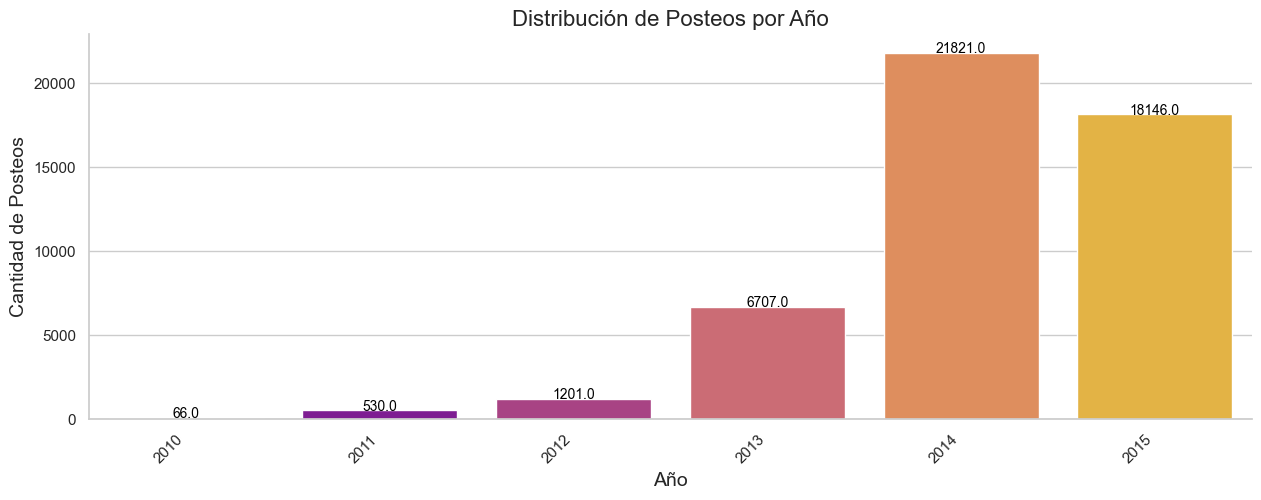

In [11]:
# Configura el estilo del gráfico como 'whitegrid' y la paleta de colores como 'plasma'
sns.set(style="whitegrid", palette="plasma")

# Crea una figura de tamaño 15 ancho y 5 alto
plt.figure(figsize=(15, 5))

# Genera un gráfico de conteo a partir del dataframe 'reviewsdf'
# usando la columna 'año' como eje x y la paleta 'plasma' para los colores
ax = sns.countplot(data=reviewsdf, x=reviewsdf["año"], palette="plasma")

# Establece el título del gráfico con tamaño de fuente 16
ax.set_title('Distribución de Posteos por Año', fontsize=16)
# Establece la etiqueta del eje x con tamaño de fuente 14
ax.set_xlabel('Año', fontsize=14)
# Establece la etiqueta del eje y con tamaño de fuente 14
ax.set_ylabel('Cantidad de Posteos', fontsize=14)
# Rota las etiquetas del eje x 45 grados y las alinea a la derecha
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Recorre cada rectángulo del gráfico (p)
for p in ax.patches:    
    # Obtiene la altura del rectángulo
    height = p.get_height()
    # Obtiene la posición x del centro del rectángulo (suma la mitad del ancho)
    x_center = p.get_x() + p.get_width() / 2.
    # Añade una anotación sobre el rectángulo con el valor de la altura
    # - Posición: (x_center, height)
    # - Alineación horizontal: 'center'
    # - Alineación vertical: 'baseline'
    # - Tamaño de fuente: 10
    # - Color: negrofor p in ax.patches:
    ax.annotate(f'{height}', (x_center, height),
                ha='center', va='baseline', fontsize=10, color='black')

sns.despine()
plt.show()

In [11]:
# Eliminamos la columna
reviewsdf = reviewsdf.drop(columns=["posted"])
reviewsdf.head(3)


,item_id,recommend,user_id,sentiment_analysis,año
0,1250,True,76561197970982479,2,2011
1,22200,True,76561197970982479,1,2011
2,43110,True,76561197970982479,2,2011


Columna **item_id**

In [ ]:
# solo nos da información del Id de cada nombre de los videojuegos

Columna **recommend**

In [13]:
recom = reviewsdf["recommend"].describe() #visualizamos las estadísticas
recom

count     48471
unique        2
top        True
freq      43533
Name: recommend, dtype: object

In [13]:
recom = reviewsdf["recommend"].value_counts() #cantidad de valores booleanos
recom

recommend
True     43533
False     4938
Name: count, dtype: int64

In [14]:
#convertimos a valores númericos, necesario para nuestro modelamo ML
reviewsdf['recommend'] = reviewsdf['recommend'].replace({True: 1, False: 0})

Graficamos

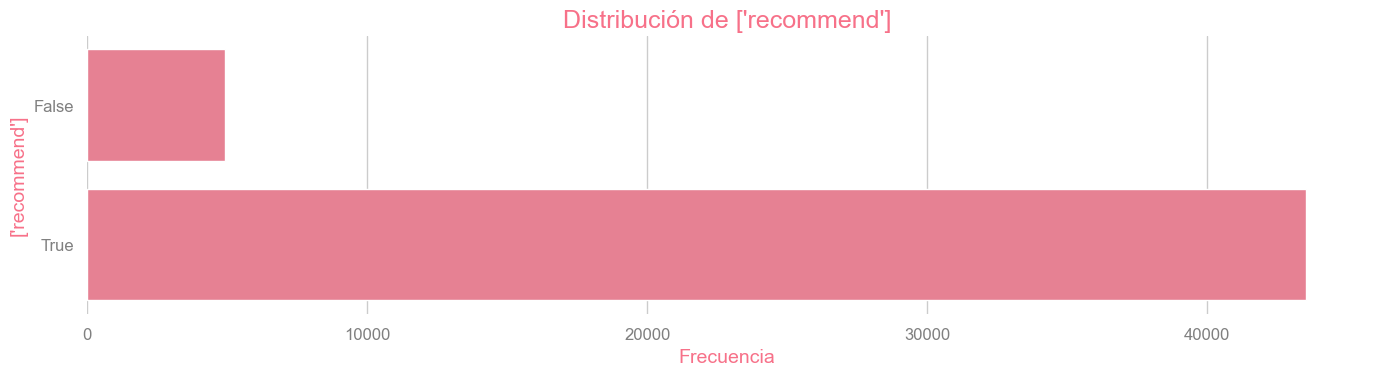

In [14]:
# Define una paleta de colores cíclica usando la paleta "husl" de seaborn
colors = cycle(sns.color_palette("husl"))

# Configura el estilo general del gráfico (rejilla blanca y un aumento de tamaño de fuente del 20%)
sns.set(style="whitegrid", font_scale=1.2)

# Define la columna que se utilizará para el eje y del gráfico
columna = ['recommend']

# Obtiene el primer color de la paleta cíclica
color = next(colors)

# Configura el tamaño de la figura del gráfico (ancho 14, alto 4)
plt.figure(figsize=(14, 4))

# Crea un gráfico de conteo usando el dataframe 'reviewsdf'
# - Eje y:columna especificada en 'columna'
# - Paleta de colores: una lista con el color obtenido de la paleta cíclica
sns.countplot(data=reviewsdf, y=reviewsdf["recommend"], palette=[color])

# Establece el título del gráfico con el texto formateado usando la variable 'columna' y el color obtenido
plt.title(f'Distribución de {columna}', fontsize=18, color=color)

# Establece la etiqueta del eje x como 'Frecuencia' con el color obtenido
plt.xlabel('Frecuencia', fontsize=14, color=color)

# Establece la etiqueta del eje y usando la variable 'columna' y el color obtenido
plt.ylabel(columna, fontsize=14, color=color)

# Define el tamaño de fuente y color gris para las marcas del eje y
plt.yticks(fontsize=12, color='gray')
plt.xticks(fontsize=12, color='gray')

# Elimina las espinas superior e izquierda del gráfico
sns.despine(left=True, bottom=True)

# Ajusta el espacio entre elementos del gráfico para una mejor visualización
plt.tight_layout()

# Muestra el gráfico generado
plt.show()

Columna **user_id**

In [15]:
# solo nos da información del Id de cada usuario

'sentiment_analysis'

In [16]:
senti = reviewsdf["sentiment_analysis"].value_counts() # obtenemos la cantidad valores por cada sentimiento
senti #sentimiento: Negativo = 0; Neutro = 1; Positivo=2 

sentiment_analysis
2    26689
1    17922
0     3860
Name: count, dtype: int64

Graficamos

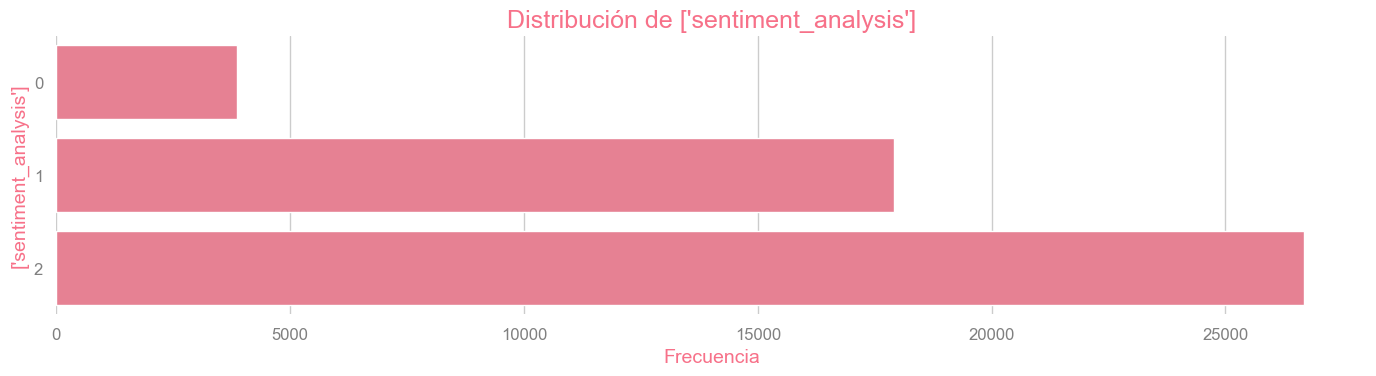

In [17]:
# Define una paleta de colores cíclica usando la paleta "husl" de seaborn
colors = cycle(sns.color_palette("husl")) 

# Configura el estilo general del gráfico (rejilla blanca y un aumento de tamaño de fuente del 20%)
sns.set(style="whitegrid", font_scale=1.2)

# Define la columna que se utilizará para el eje y del gráfico
columna = ['sentiment_analysis']

# Obtiene el primer color de la paleta cíclica
color = next(colors)

# Configura el tamaño de la figura del gráfico (ancho 14, alto 4)
plt.figure(figsize=(14, 4))

# Crea un gráfico de conteo usando el dataframe 'reviewsdf'
# - Eje y:columna especificada en 'columna'
# - Paleta de colores: una lista con el color obtenido de la paleta cíclica
sns.countplot(data=reviewsdf, y=reviewsdf["sentiment_analysis"], palette=[color])

# Establece el título del gráfico con el texto formateado usando la variable 'columna' y el color obtenido
plt.title(f'Distribución de {columna}', fontsize=18, color=color)

# Establece la etiqueta del eje x como 'Frecuencia' con el color obtenido
plt.xlabel('Frecuencia', fontsize=14, color=color)

# Establece la etiqueta del eje y usando la variable 'columna' y el color obtenido
plt.ylabel(columna, fontsize=14, color=color)

# Define el tamaño de fuente y color gris para las marcas del eje y
plt.yticks(fontsize=12, color='gray')
plt.xticks(fontsize=12, color='gray')

# Elimina las espinas superior e izquierda del gráfico
sns.despine(left=True, bottom=True)

# Ajusta el espacio entre elementos del gráfico para una mejor visualización
plt.tight_layout()

# Muestra el gráfico generado
plt.show()


Guardamos el EDA en archivos CSV y Parquet

In [20]:
tabla = pa.Table.from_pandas(reviewsdf) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"../0-DATA/australian_user_reviewsEDA.parquet") # guardamos la tabla en formato parquet

In [21]:
reviewsdf.to_csv("../0-DATA/australian_user_reviewsEDA.csv", index=False, encoding="utf-8") 